<a href="https://colab.research.google.com/github/lifewinning/MLTSA22_IBurrington/blob/main/HW9/IB_HW9_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and loading data

In [ ]:
import numpy as np
import pylab as pl

from sklearn import model_selection
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras import optimizers

In [ ]:
pl.style.use('seaborn')
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/MLTSA22/PLAsTiCC2018/

/content/gdrive/MyDrive/MLTSA22/PLAsTiCC2018


In [ ]:
ls

garbage.npy      lcvs.npy     model.png         training_set.csv.zip
garbage_std.npy  lcvs_pb.npy  training_set.csv  training_set_metadata.csv


In [ ]:
np.load('garbage_std.npy').shape

(47088, 1, 100)

Realized partway through this homework that it might be helpful to start from standardized data, so re-did that but of HW8. 

In [ ]:
lcvs_np_s = np.load('garbage_std.npy').reshape(47088, 100)

In [ ]:
indices = np.arange(0, len(lcvs_np_s))
X_train, X_test, index_train, index_test = model_selection.train_test_split(lcvs_np_s, indices, test_size=0.2, random_state=12)

In [ ]:
X_train.shape

(37670, 100)

# Comparing autoencoder models

I'm not including all the variations I tried before because if you try to run it colab will break, but here's an explanation of why I made the choices I made in my model

**Layer units**: honestly these were kind of a guess--I'm just assuming that there's some good bit-based reason most examples of autoencoders use powers of 2. 

**Activation functions**: I landed on the activation functions here after realizing that most of the activation functions we saw in the example notebooks were based on reducing outputs to 0 and 1 or have a minimum value of 0--which isn't very helpful in a dataset with negative numbers. A linear activation function probably would have been fine, but the loss function results didn't show much of a curve (wait, can...can we call that a "learning curve"?) so suspected it would take a long long time to actually converge, and elu seemed to be more effective. I chose tanh for my compression and bottleneck because I wanted to retain a negative number space--it seemed like it was harder to re-create negative values when expanding the data from sigmoid or relu. 

**Optimizer**: adadelta created a smoother learning curve, but adam produced a lower mean squared error--it would probably be safer to go with adadelta, but I'm showing both just to compare. 

**Epochs**: I probably could have run the adadelta-optmized model longer to get even closer to 0 but I didn't want to get rate-limited by Colab, and it might have even made sense to run the Adam-optimized model for less time to prevent possible overfitting, but I think it's basically good enough?

In [ ]:
ndim = X_train[0].shape[0]
model_lcvs_ada = Sequential()

model_lcvs_ada.add(Dense(128, activation='elu', input_dim=ndim))
model_lcvs_ada.add(Dense(64, activation='tanh'))

#bottleneck
model_lcvs_ada.add(Dense(32, activation='tanh'))

model_lcvs_ada.add(Dense(64, activation='tanh'))
model_lcvs_ada.add(Dense(128, activation='elu'))
#output layer, same size as input
model_lcvs_ada.add(Dense(ndim, activation='elu'))


In [ ]:
model_lcvs_ada.compile(optimizer="adadelta", 
                    loss="mean_squared_error")
history_ada = model_lcvs_ada.fit(X_train, X_train, 
                               validation_data=(X_test, X_test),
                               epochs=400, batch_size=100, verbose=1)

Epoch 1/400
377/377 [==============================] - 7s 9ms/step - loss: 0.8316 - val_loss: 0.8219
Epoch 2/400
377/377 [==============================] - 3s 7ms/step - loss: 0.8112 - val_loss: 0.8013
Epoch 3/400
377/377 [==============================] - 2s 4ms/step - loss: 0.7908 - val_loss: 0.7812
Epoch 4/400
377/377 [==============================] - 2s 5ms/step - loss: 0.7714 - val_loss: 0.7622
Epoch 5/400
377/377 [==============================] - 2s 5ms/step - loss: 0.7529 - val_loss: 0.7442
Epoch 6/400
377/377 [==============================] - 2s 5ms/step - loss: 0.7354 - val_loss: 0.7271
Epoch 7/400
377/377 [==============================] - 2s 4ms/step - loss: 0.7187 - val_loss: 0.7107
Epoch 8/400
377/377 [==============================] - 2s 5ms/step - loss: 0.7027 - val_loss: 0.6950
Epoch 9/400
377/377 [==============================] - 2s 5ms/step - loss: 0.6873 - val_loss: 0.6798
Epoch 10/400
377/377 [==============================] - 2s 4ms/step - loss: 0.6724 - val_lo

In [ ]:
model_lcvs_adam = Sequential()

model_lcvs_adam.add(Dense(128, activation='elu', input_dim=ndim))
model_lcvs_adam.add(Dense(64, activation='tanh'))

#bottleneck
model_lcvs_adam.add(Dense(32, activation='tanh'))

model_lcvs_adam.add(Dense(64, activation='tanh'))
model_lcvs_adam.add(Dense(128, activation='elu'))
#output layer, same size as input
model_lcvs_adam.add(Dense(ndim, activation='elu'))


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model_lcvs_adam.compile(optimizer=opt, 
                    loss="mean_squared_error")

In [ ]:
history_adam = model_lcvs_adam.fit(X_train, X_train, 
                               validation_data=(X_test, X_test),
                               epochs=200, batch_size=100, verbose=1)

Epoch 1/200
377/377 [==============================] - 3s 5ms/step - loss: 0.1385 - val_loss: 0.0912
Epoch 2/200
377/377 [==============================] - 2s 4ms/step - loss: 0.0853 - val_loss: 0.0797
Epoch 3/200
377/377 [==============================] - 2s 4ms/step - loss: 0.0796 - val_loss: 0.0793
Epoch 4/200
377/377 [==============================] - 2s 4ms/step - loss: 0.0788 - val_loss: 0.0752
Epoch 5/200
377/377 [==============================] - 2s 5ms/step - loss: 0.0764 - val_loss: 0.0761
Epoch 6/200
377/377 [==============================] - 2s 6ms/step - loss: 0.0754 - val_loss: 0.0767
Epoch 7/200
377/377 [==============================] - 2s 4ms/step - loss: 0.0754 - val_loss: 0.0717
Epoch 8/200
377/377 [==============================] - 2s 4ms/step - loss: 0.0745 - val_loss: 0.0742
Epoch 9/200
377/377 [==============================] - 2s 4ms/step - loss: 0.0750 - val_loss: 0.0718
Epoch 10/200
377/377 [==============================] - 2s 4ms/step - loss: 0.0740 - val_lo

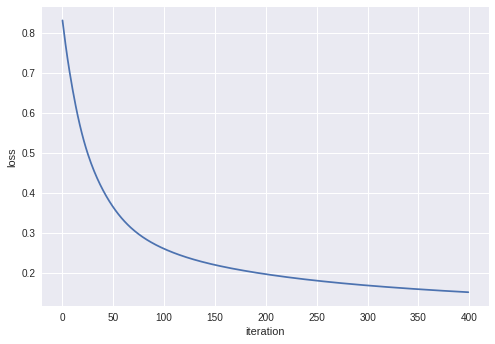

In [ ]:
pl.plot(np.array(history_adad.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration');

Fig. 1: Loss plot of model using adadelta optimization. It probably could use some more training but I'm worried about getting rate limited by Colab. 

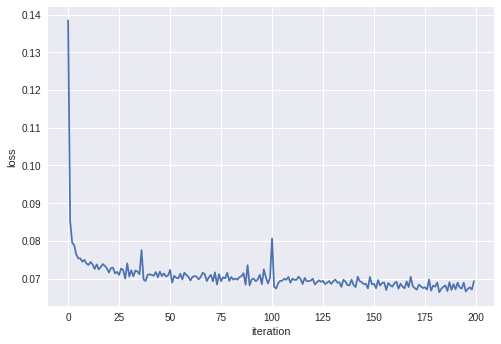

In [ ]:
pl.plot(np.array(history_adam.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration');

Fig. 2: Loss plot for autoencoder model using Adam optimizer. I'm worried about overfitting here because of the little spiky guys. 

In [ ]:
model_output_adam = model_lcvs_adam.predict(X_test)
model_output_ada = model_lcvs_ada.predict(X_test)

In [ ]:
np.random.seed(123)
targets = X_test.shape[0]
choices = np.random.choice(targets, 10, replace = False)

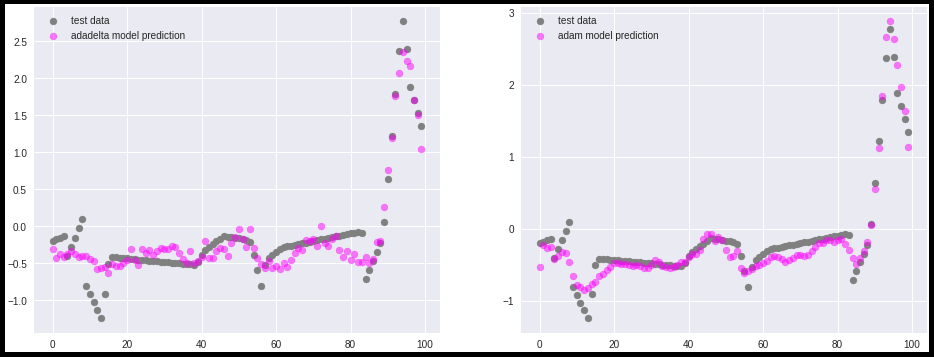

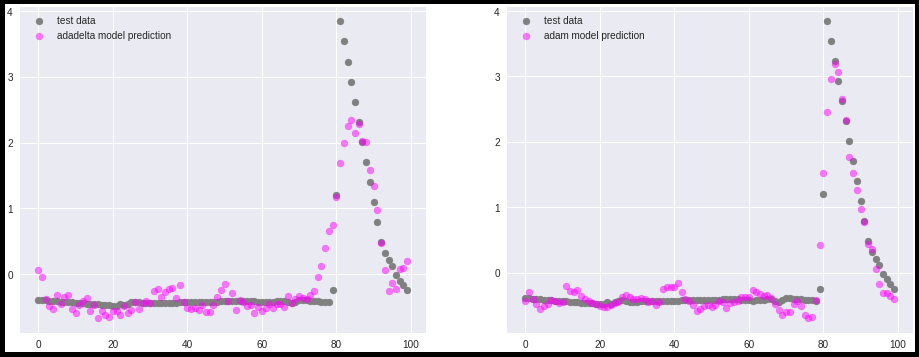

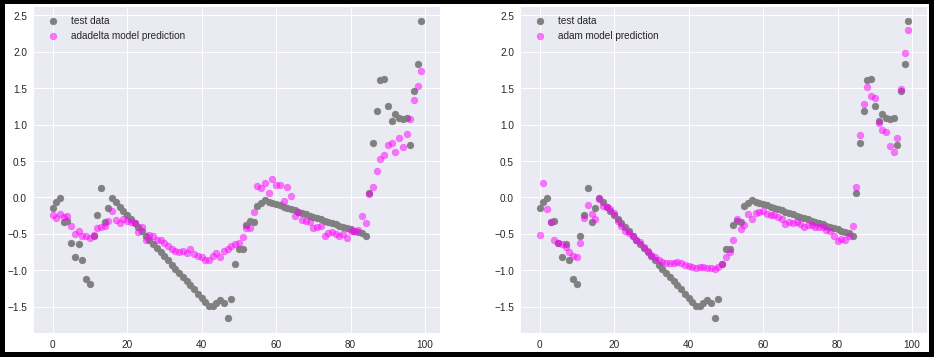

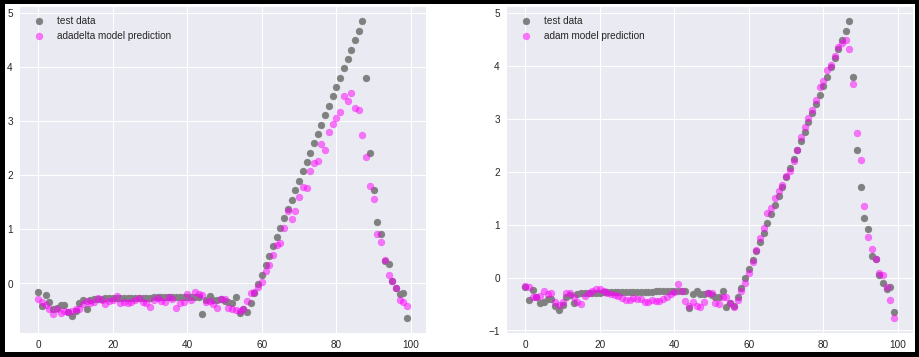

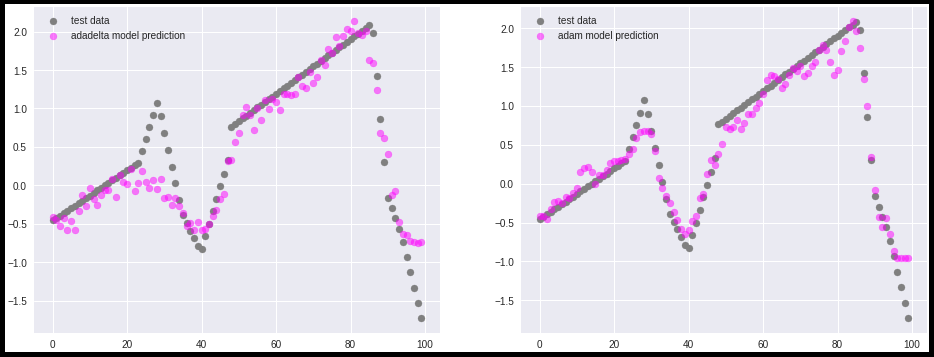

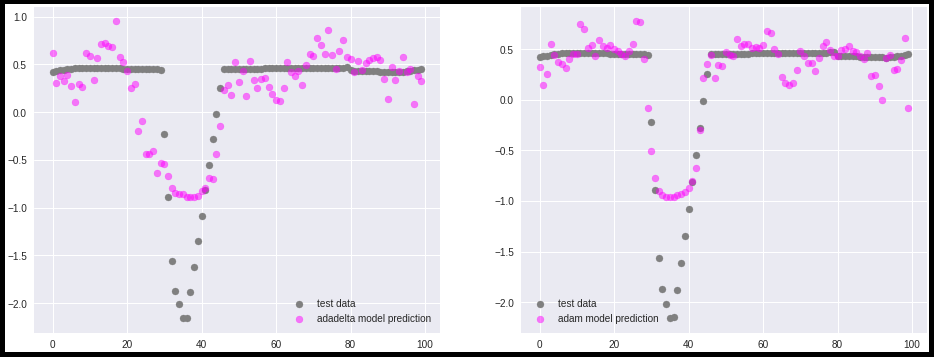

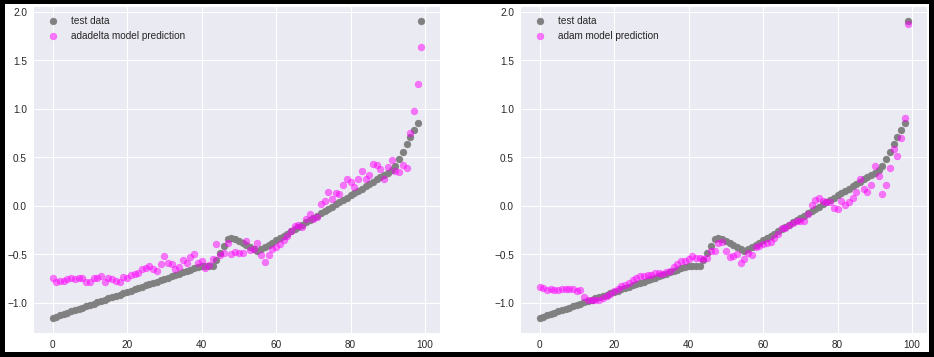

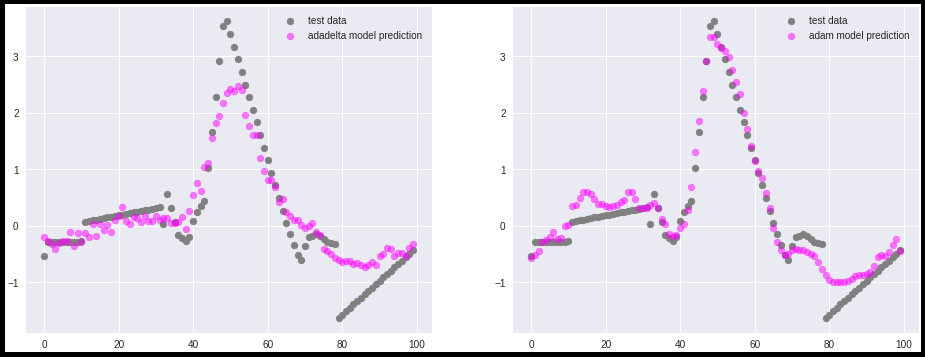

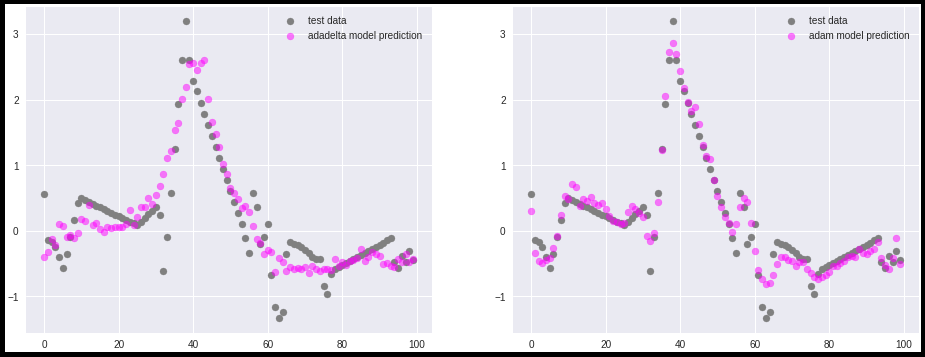

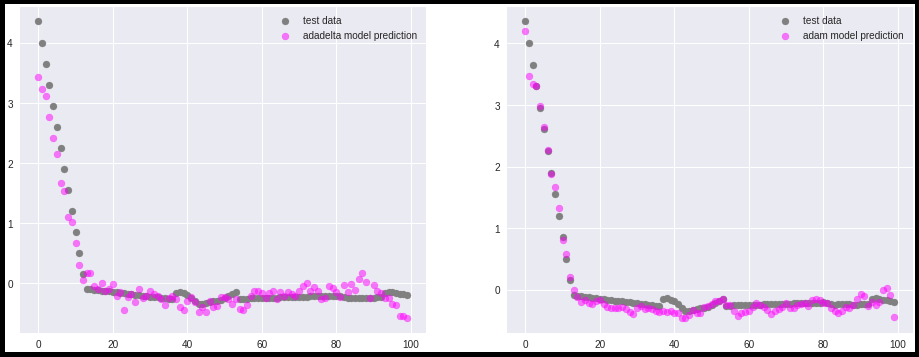

In [ ]:
# comparing test results to original lightcurve
for choice in choices: 

  fig, ax = pl.subplots(1, 2, figsize=(16, 6),linewidth=10, edgecolor="black")
  ax[0].scatter(np.arange(0,100), X_test[choice], label ="test data", color="gray")
  ax[0].scatter(np.arange(0,100), model_output_ada[choice], label="adadelta model prediction", alpha=0.5, color="magenta")
  ax[0].legend()

  ax[1].scatter(np.arange(0,100), X_test[choice], label ="test data", color="gray")
  ax[1].scatter(np.arange(0,100), model_output_adam[choice], label="adam model prediction", alpha=0.5, color="magenta")
  ax[1].legend()

Fig. 3: comparing outputs of test data and model predictions on 10 randomly selected items in the test set. The Adam-optimized model only looks slightly better? But hard to say for sure just from this handful of plots. 

<font color="red">FBB not too shabby! pretty good job in fact</font>


In [ ]:
print("total mse of adadelta model: {}".format(mean_squared_error(X_test, model_output_ada)))
print("total mse of adam model: {}".format(mean_squared_error(X_test, model_output_adam)))


total mse of adadelta model: 0.15073490763341685
total mse of adam model: 0.06582403895481498


In [ ]:
mse_ada = [mean_squared_error(X_test[choice], model_output_ada[choice]) for choice in np.arange(0,len(X_test))]
mse_adam = [mean_squared_error(X_test[choice], model_output_adam[choice]) for choice in np.arange(0,len(X_test))]

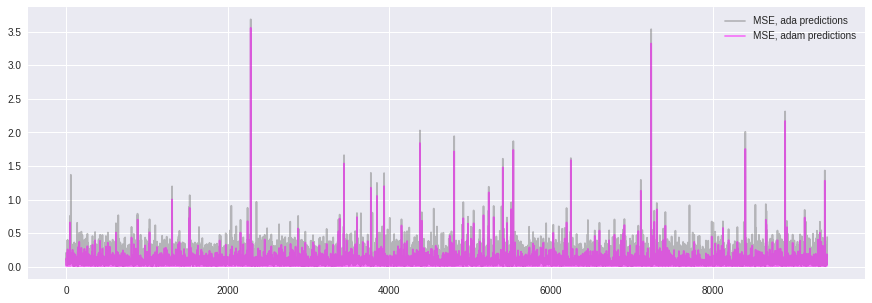

In [ ]:
fig, ax = pl.subplots(figsize=(15, 5))
pl.plot(np.arange(0,len(X_test)), mse_ada, label="MSE, ada predictions", color="gray", alpha=0.5)
pl.plot(np.arange(0,len(X_test)), mse_adam, label="MSE, adam predictions", color="magenta", alpha=0.5)
pl.legend();

Fig. 4: Comparing the mean squared errors of my two models--the adadelta-optimized model is generally higher. Again, running it a little longer might have made a difference but I'm less stressed out about the overfitting concern with the Adam-optimized model looking at this. Even where the Adam-optimized model spikes, it's still smaller values than the adadelta model.

<font color="red">FBB very good</font>


# What I learned

Overall, I'm pretty impressed with the autoencoder's accuracy, but I don't really know if it tells me very much about the PLAsTiCC data because the interpolation and structuring of my data feels like such an abstraction from the original dataset. 

<font color="red">FBB fair point. </font>


# Looking at our bottleneck layer

In [ ]:
# input placeholder
inp = model_lcvs_adam.input                   
# extract the bottle neck outputs
outputs = model_lcvs_adam.layers[2].output     
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])    

# Testing
layer_outs = functors(X_test)
layer_outs[0]

array([[ 0.6790417 , -0.21428326,  0.19229776, ...,  0.25051898,
         0.30755368,  0.09518769],
       [ 0.10817114,  0.25710028, -0.09481719, ...,  0.07661466,
         0.562866  , -0.3481621 ],
       [ 0.55846983,  0.09315549, -0.40595567, ...,  0.12054338,
        -0.5100786 , -0.00258739],
       ...,
       [-0.17014289,  0.24570408,  0.22249478, ..., -0.53840715,
        -0.6081049 , -0.38934892],
       [ 0.00094625,  0.03775217, -0.34989735, ...,  0.10297143,
        -0.43390384,  0.36057732],
       [ 0.4491892 , -0.3206665 , -0.00587956, ...,  0.20506698,
         0.08059257,  0.66283196]], dtype=float32)

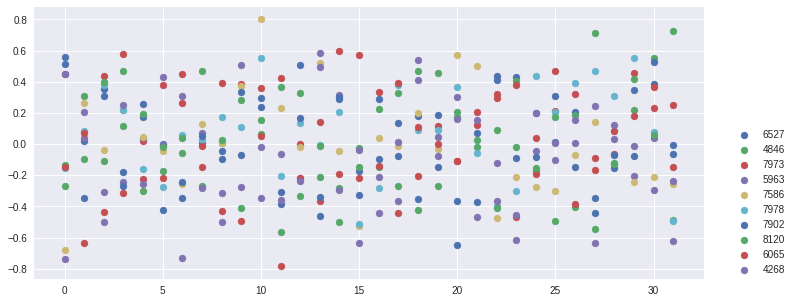

In [ ]:
fig, ax = pl.subplots(figsize=(12, 5))
for choice in choices:
  ax.scatter(np.arange(0,32), layer_outs[0][choice], label=str(choice))
  ax.legend(loc=(1.04,0))

Fig. 5: bottleneck layer results of model predictions on 10 randomly selected interpolations from the test data. Mostly I just wanted to see them all together to get a sense of whether/how much they differ from each other. Apparently, not by very much! 

<font color="red">FBB this rarely visualizesto something helpful but good job visualizing it</font>


# Did we actually do a random forest last time? Doing feature extraction anyway

## Importing training set and metadata, feature extraction

In [ ]:
# I realize calling this "raw" data is problematic aside from the fact raw data is a fiction but I didn't feel creative
lcvs_raw = pd.read_csv('training_set.csv')

In [ ]:
# just a reminder of what we are looking at
lcvs_raw.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [ ]:
metadata = pd.read_csv('training_set_metadata.csv')
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [ ]:
# my silly little functions for doing my silly little merges

def features_df_agg(df, lam, name):
  newdf = df.groupby(["object_id", "passband"])[["flux"]].agg(lam)
  newdf.rename(columns={'flux': name}, inplace=True)
  return newdf

def features_df_app(df, lam, name):
  newdf = df.groupby(["object_id", "passband"])[["flux"]].apply(lam)
  newdf.rename(columns={'flux': name}, inplace=True)
  return newdf
  
# function for merging
def mergeon(df1, df2): 
  return df1.merge(df2, left_index=True, right_index=True)

In [ ]:
lcvs_raw['flux_s'] = features_df_app(lcvs_raw, (lambda x: (x - x.mean()) - x.std()), 'std_flux').values

In [ ]:
s_median = lcvs_raw.groupby(["object_id", "passband"])[["flux_s"]].median()
s_median.rename(columns={'flux_s': 's_median'}, inplace=True)

In [ ]:
# get min and max with error, raw data--probably could have done this with features_df but wasn't sure how to do the error merge

min = lcvs_raw.groupby(["object_id", "passband"])[["flux"]].min().reset_index()

# on the off chance any max values are duplicates, also match by id
merge = pd.merge(min,lcvs_raw[['flux','flux_err','object_id']],on=['flux', "object_id"])
merge.rename(columns={"flux": "min", 'flux_err': 'min_err'}, inplace=True)
merge = merge.groupby(["object_id", "passband"]).min()

max = lcvs_raw.groupby(["object_id", "passband"])[["flux"]].max().reset_index()

merge2 = pd.merge(max,lcvs_raw[['flux','flux_err','object_id']],on=['flux', "object_id"])
merge2.rename(columns={"flux": "max", 'flux_err': 'max_err'}, inplace=True)
merge2 = merge2.groupby(["object_id", "passband"]).max()

features = mergeon(merge, merge2)

In [ ]:
features = mergeon(features, s_median)

In [ ]:
extracts  = [
    features_df_agg(lcvs_raw, (lambda x: x.std()), "std"), # standard deviation 
    features_df_agg(lcvs_raw, (lambda x: x.mean()), "mean"), # mean 
    features_df_app(lcvs_raw, (lambda x: x.skew()), "skew"), # skewness
]

for ext in extracts: 
  features = mergeon(features, ext)

features

min    min_err           max     max_err  \
object_id passband                                                     
615       0         -116.913223   3.097836    125.182808    3.909554   
          1        -1100.440063   6.709106    660.626343    4.961018   
          2         -681.858887   4.041204    611.984558    3.908728   
          3         -530.644592   3.672556    445.737061    3.952905   
          4         -422.184509   4.089213    381.953735    3.885009   
...                         ...        ...           ...         ...   
130779836 1          -34.273514  19.637548   3320.936279   56.901775   
          2          -14.478923  23.485855  31437.089844  362.050262   
          3          -41.850040  26.782366   4995.144043   50.181072   
          4          -72.634567  44.931393  54982.875000  424.749237   
          5          -86.457382  57.588879  29058.212891  210.280746   

                        s_median           std         mean      skew  
object_id passband                                                     
615       0           -90.705405     83.944735    -3.254554  0.128917  
          1          -704.145359    601.787302  -385.699911  0.415580  
          2          -586.660785    455.121346  -134.146566  0.339918  
          3          -376.492496    335.425053  -121.103501  0.293128  
          4          -339.390223    291.803449   -55.954592  0.200096  
...                          ...           ...          ...       ...  
130779836 1         -1813.068527   1197.557111   725.169852  1.798901  
          2         -8731.842799   6440.422386  2690.360415  4.057211  
          3         -2030.515105   1443.868085   755.993902  2.554678  
          4        -14411.352211  11006.766106  3489.185336  4.484138  
          5        -12306.688396   8687.101173  4151.358875  2.463557  

[47088 rows x 8 columns]

In [ ]:
metadata_reset = metadata.set_index('object_id')
cols = ['decl','hostgal_photoz','hostgal_photoz_err','target']

merge_metadata = metadata_reset[cols]

features = mergeon(features.unstack(1), merge_metadata)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  validate=validate,


In [ ]:
features

min    min_err           max     max_err  \
object_id passband                                                     
615       0         -116.913223   3.097836    125.182808    3.909554   
          1        -1100.440063   6.709106    660.626343    4.961018   
          2         -681.858887   4.041204    611.984558    3.908728   
          3         -530.644592   3.672556    445.737061    3.952905   
          4         -422.184509   4.089213    381.953735    3.885009   
...                         ...        ...           ...         ...   
130779836 1          -34.273514  19.637548   3320.936279   56.901775   
          2          -14.478923  23.485855  31437.089844  362.050262   
          3          -41.850040  26.782366   4995.144043   50.181072   
          4          -72.634567  44.931393  54982.875000  424.749237   
          5          -86.457382  57.588879  29058.212891  210.280746   

                        s_median           std         mean  
object_id passband                                           
615       0           -90.705405     83.944735    -3.254554  
          1          -704.145359    601.787302  -385.699911  
          2          -586.660785    455.121346  -134.146566  
          3          -376.492496    335.425053  -121.103501  
          4          -339.390223    291.803449   -55.954592  
...                          ...           ...          ...  
130779836 1         -1813.068527   1197.557111   725.169852  
          2         -8731.842799   6440.422386  2690.360415  
          3         -2030.515105   1443.868085   755.993902  
          4        -14411.352211  11006.766106  3489.185336  
          5        -12306.688396   8687.101173  4151.358875  

[47088 rows x 7 columns]

Skew breaks the Random Forest because there is one (1) NaN value. Sorry to see you go, buddy!

<font color="red">FBB oh well</font>


In [ ]:
features = features.drop(labels=["skew"], axis=1)

## Oh no I've only done a random forest regressor not a random forest classifier!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

<font color="red">FBB oh no! its even easier1 you were 3 lines of code to the end!</font>
